In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import pandas as pd

In [4]:
uploaded = files.upload()

cost_df = pd.read_csv('EconomiesOfScale.csv')

Saving EconomiesOfScale.csv to EconomiesOfScale.csv


In [5]:
with open('EconomiesOfScale.csv', 'r') as f:
    print(f.read())

Number of Units,Manufacturing Cost
1,95.06605578
1.185993649,96.53174997
1.19149864,73.66131056
1.204771398,95.5668425
1.298772823,98.77701266
1.307435033,100
1.339385699,94.75975637
1.379043602,67.18538349
1.419999515,72.88604061
1.473948344,61.96769605
1.540898452,69.28409692
1.574599858,64.55249643
1.620309789,77.67937742
1.631997227,58.42664546
1.65268704,51.4409698
1.695801032,60.92903611
1.704214274,81.86775617
1.739201389,60.5725967
1.760146268,74.12260141
1.767001878,71.61417311
1.777280346,77.98340868
1.784341505,57.68193975
1.802089167,52.96440828
1.815917415,69.1787313
1.82328911,70.42005203
1.831097216,36.08580039
1.832406608,81.49469151
1.842875742,59.64067983
1.845840644,63.40954945
1.865227752,55.03613926
1.87414418,58.06045968
1.895730774,52.11412489
1.943028599,61.27727337
1.987770404,62.5960052
1.991902366,61.23299391
2.004803791,60.02154297
2.052316741,47.88555562
2.064920557,54.90274827
2.07583577,54.17817589
2.105273495,60.21890139
2.113298687,44.71285113
2.1185895

In [6]:
cost_df.corr()['Manufacturing Cost'].sort_values()


,Manufacturing Cost
Number of Units,-0.760905
Manufacturing Cost,1.000000


In [7]:
cost_df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [8]:
cost_df.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [9]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [10]:
cost_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [11]:
cost_df.isnull()

,Number of Units,Manufacturing Cost
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [12]:
cost_df.isnull().sum()

,0
Number of Units,0
Manufacturing Cost,0


In [13]:
100*(cost_df.isnull().sum()/len(cost_df))

,0
Number of Units,0.0
Manufacturing Cost,0.0


In [14]:
cost_df.shape

(1000, 2)

In [15]:
cost_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


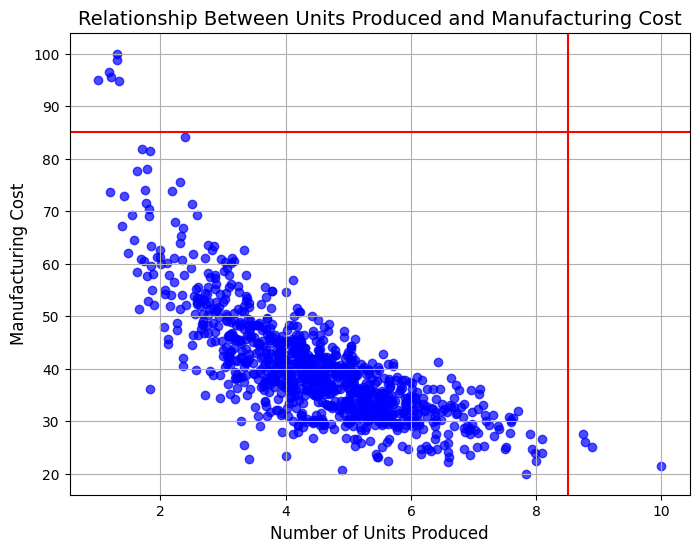

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(cost_df['Number of Units'], cost_df['Manufacturing Cost'], color='blue', alpha=0.7)

plt.title("Relationship Between Units Produced and Manufacturing Cost", fontsize=14)
plt.xlabel("Number of Units Produced", fontsize=12)
plt.ylabel("Manufacturing Cost", fontsize=12)
plt.axhline(y=85, color='r')
plt.axvline(x=8.5, color='r')
plt.grid(True)
plt.show()

In [17]:
cost_df[(cost_df['Number of Units']>8)&(cost_df['Manufacturing Cost']<85)][['Number of Units', 'Manufacturing Cost']]


,Number of Units,Manufacturing Cost
994,8.087334,26.569888
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [18]:
index_drop  =cost_df[(cost_df['Number of Units']>8)&(cost_df['Manufacturing Cost']<85)].index
index_drop

Index([994, 995, 996, 997, 998, 999], dtype='int64')

In [19]:
cost_df[cost_df['Number of Units'].isnull()]


,Number of Units,Manufacturing Cost


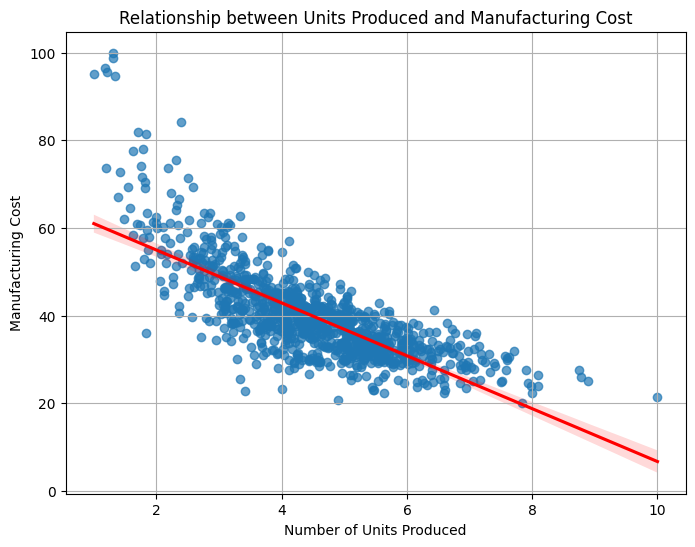

In [20]:
plt.figure(figsize=(8,6))
sns.regplot(x='Number of Units', y= 'Manufacturing Cost',data=cost_df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

plt.title("Relationship between Units Produced and Manufacturing Cost")
plt.xlabel("Number of Units Produced")
plt.ylabel("Manufacturing Cost")
plt.grid(True)
plt.show()

In [21]:
x_col='Number of Units'
y_col='Manufacturing Cost'

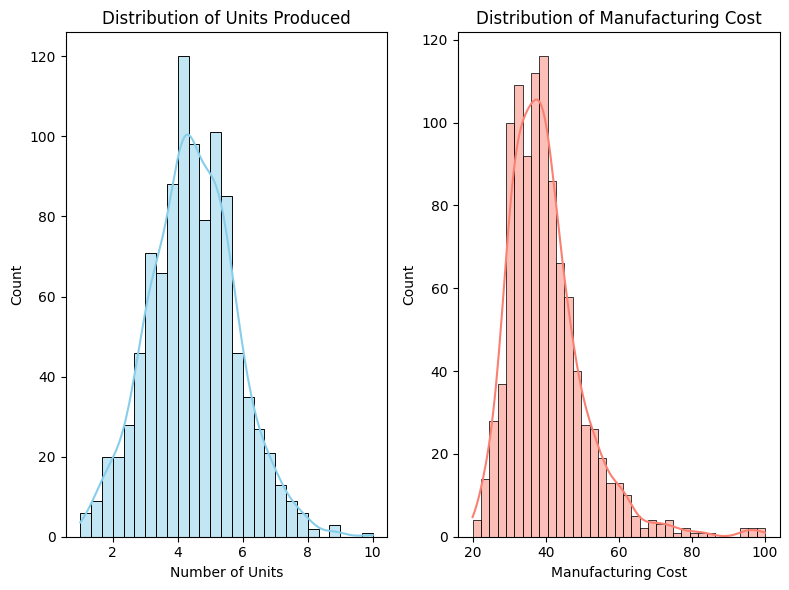

In [22]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
sns.histplot(cost_df[x_col], kde=True, color="skyblue")
plt.title("Distribution of Units Produced")

plt.subplot(1,2,2)
sns.histplot(cost_df[y_col], kde=True, color="salmon")
plt.title("Distribution of Manufacturing Cost")

plt.tight_layout()
plt.show()

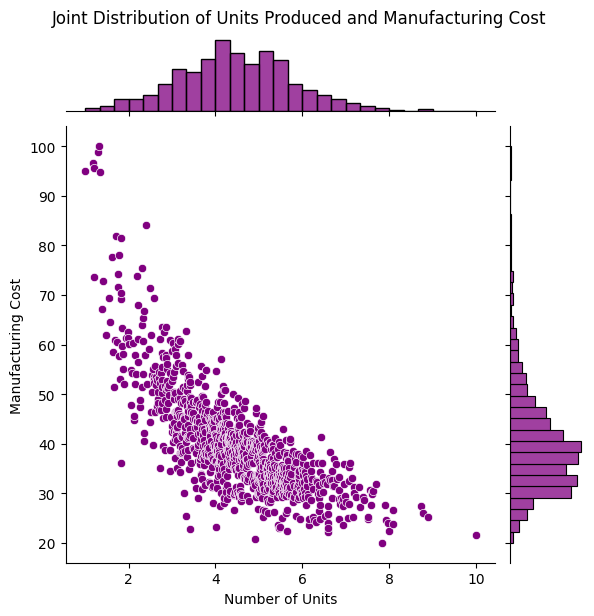

In [23]:
sns.jointplot(x=x_col, y=y_col, data=cost_df, kind="scatter", color="purple", height=6)
plt.suptitle("Joint Distribution of Units Produced and Manufacturing Cost", y=1.02)
plt.show()


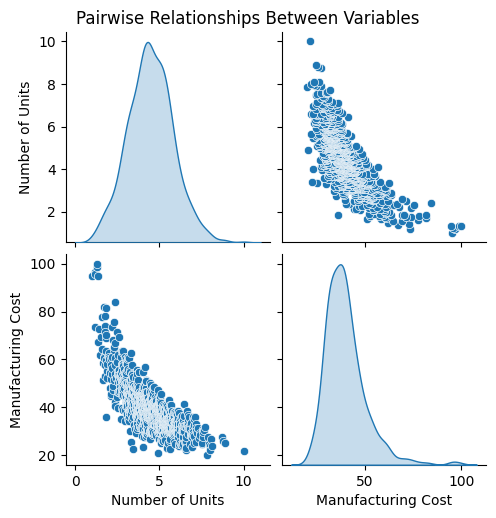

In [24]:
sns.pairplot(cost_df, diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Variables", y=1.02)
plt.show()


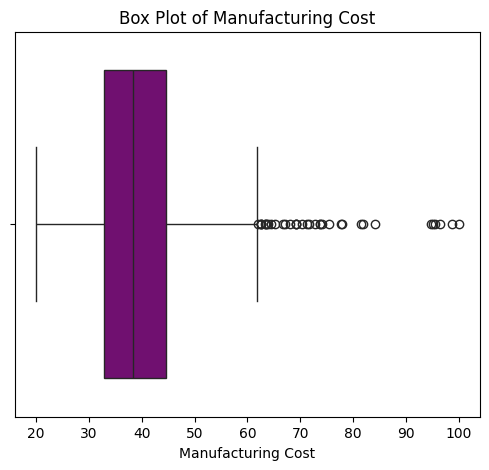

In [25]:
plt.figure(figsize=(6,5))
sns.boxplot(x=cost_df[y_col], color="purple")
plt.title("Box Plot of Manufacturing Cost")
plt.show()


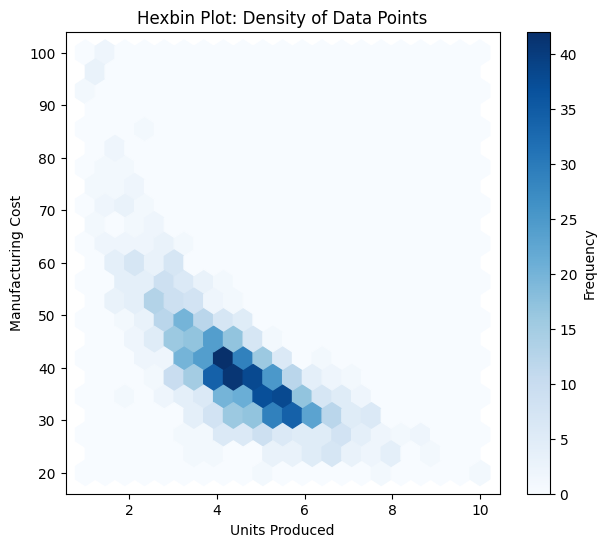

In [26]:
plt.figure(figsize=(7,6))
plt.hexbin(cost_df[x_col], cost_df[y_col], gridsize=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel("Units Produced")
plt.ylabel("Manufacturing Cost")
plt.title("Hexbin Plot: Density of Data Points")
plt.show()


In [27]:
target = "Manufacturing Cost"
y = cost_df[target]
X = cost_df.drop(columns=[target])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (800, 1) (800,)
Test set shape: (200, 1) (200,)


In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

Intercept: 67.89012908512075
Coefficient(s): [-6.21850698]


Intercept:
This is the expected manufacturing cost when the number of units produced is zero.
It represents the fixed cost of the factory.

Coefficient:
For each additional unit produced, the manufacturing cost increases on average by that number.
This represents the variable cost per unit.

Negative coefficient meaning:
A negative coefficient indicates that as the independent variable increases, the dependent variable decreases.
In other words, the relationship is inverse.
Interpretation: For each additional unit produced, the total cost decreases by -6.21850698 units on average.
Economic meaning: This could reflect economies of scale, where increasing production reduces the cost per unit.

In [30]:
model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(X_train, y_train)
print("Coefficients without intercept:", model_no_intercept.coef_)

Coefficients without intercept: [7.750607]


In [31]:
# Print coefficients and intercept of the previous model
print("\n=== With intercept ===")
print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

print("\n=== Without intercept ===")
print("Intercept: 0 (not fitted)")
print("Coefficient(s):", model_no_intercept.coef_)


=== With intercept ===
Intercept: 67.89012908512075
Coefficient(s): [-6.21850698]

=== Without intercept ===
Intercept: 0 (not fitted)
Coefficient(s): [7.750607]



###  Interpretation:

1. **With intercept (`fit_intercept=True`)**

   * The model can include a constant term (b₀).
   * Better fits data that **does not pass through zero**.
   * Equation:

     [
     y = b_0 + b_1 x
     ]

2. **Without intercept (`fit_intercept=False`)**

   * The model is forced to go through the **origin (0,0)**.
   * Coefficients may be **larger or smaller** to fit the data.
   * If the real data includes **fixed costs**, a model without intercept usually has **higher error**.
   * Equation:

     [
     y = b_1 x
     ]



In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Degree 2
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)


model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly2, y_train)


print("Degree 2 Polynomial Regression:")
print("output:", model_poly2)
print("Intercept:", model_poly2.intercept_)
print("Coefficients:", model_poly2.coef_)


Degree 2 Polynomial Regression:
output: LinearRegression()
Intercept: 92.03582034949117
Coefficients: [-17.81636965   1.27181952]


In [33]:
# Degree 3
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

model_poly3 = LinearRegression()
model_poly3.fit(X_train_poly3, y_train)

print("\nDegree 3 Polynomial Regression:")
print("output:", model_poly3)
print("Intercept:", model_poly3.intercept_)
print("Coefficients:", model_poly3.coef_)



Degree 3 Polynomial Regression:
output: LinearRegression()
Intercept: 114.03870684172352
Coefficients: [-34.51814321   5.05171512  -0.26070502]


In [34]:
degrees = [4, 5, 10]
models = {}
outputs = {}

for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    models[deg] = model
    outputs[deg] = {
        "intercept": model.intercept_,
        "coefficients": model.coef_
    }

    print(f"\nDegree {deg} Polynomial Regression:")
    print("output:", model)
    print("Intercept:", model.intercept_)
    print("Coefficients:", model.coef_)



Degree 4 Polynomial Regression:
output: LinearRegression()
Intercept: 133.2471461065202
Coefficients: [-5.48053513e+01  1.21644641e+01 -1.26644861e+00  4.90848244e-02]

Degree 5 Polynomial Regression:
output: LinearRegression()
Intercept: 162.86766094950636
Coefficients: [-9.54138252e+01  3.19305847e+01 -5.63692225e+00  4.94554373e-01
 -1.69105527e-02]

Degree 10 Polynomial Regression:
output: LinearRegression()
Intercept: -156.04291966258745
Coefficients: [ 1.10238413e+03 -1.74010352e+03  1.39097743e+03 -6.61718263e+02
  2.00207514e+02 -3.95127832e+01  5.06589940e+00 -4.06355861e-01
  1.85064465e-02 -3.64845343e-04]



Degree 4 Polynomial Regression:
Intercept: 133.2471461065202
Coefficients: [-5.48053513e+01  1.21644641e+01 -1.26644861e+00  4.90848244e-02]


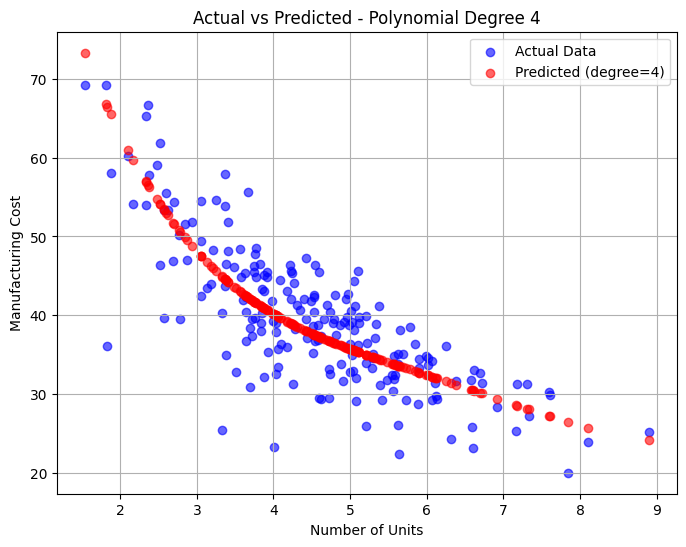


Degree 5 Polynomial Regression:
Intercept: 162.86766094950636
Coefficients: [-9.54138252e+01  3.19305847e+01 -5.63692225e+00  4.94554373e-01
 -1.69105527e-02]


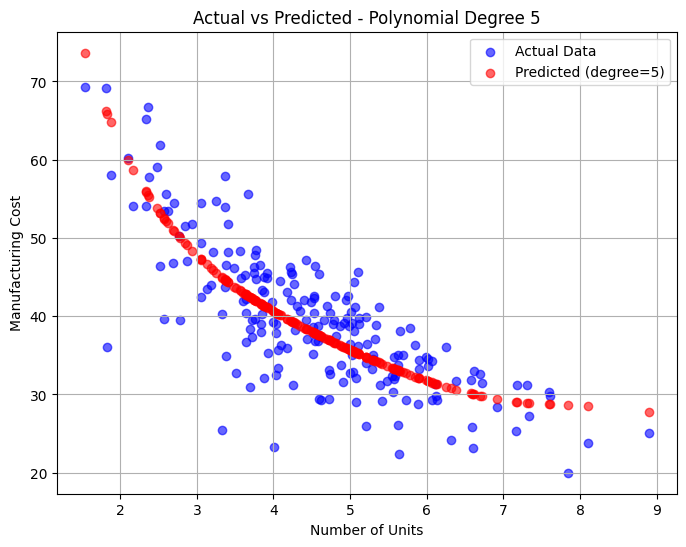


Degree 10 Polynomial Regression:
Intercept: -156.04291966258745
Coefficients: [ 1.10238413e+03 -1.74010352e+03  1.39097743e+03 -6.61718263e+02
  2.00207514e+02 -3.95127832e+01  5.06589940e+00 -4.06355861e-01
  1.85064465e-02 -3.64845343e-04]


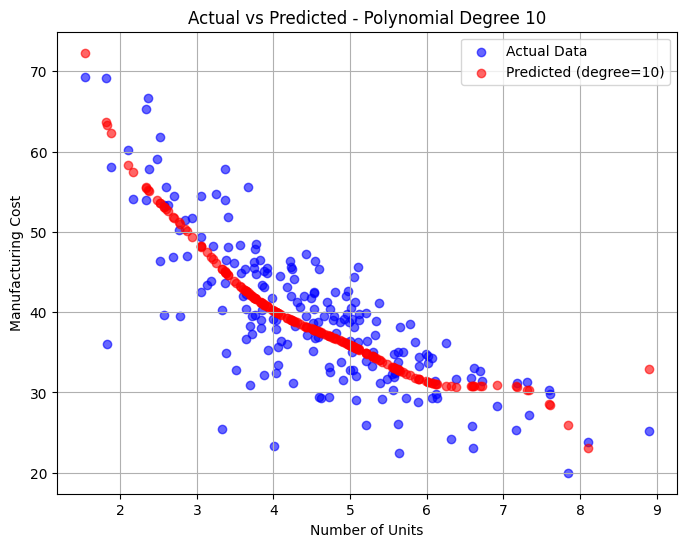

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


degrees = [4, 5, 10]
models = {}
outputs = {}

def plot_real_vs_pred(X, y_real, y_pred, degree):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y_real, color='blue', alpha=0.6, label='Actual Data')
    plt.scatter(X, y_pred, color='red', alpha=0.6, label=f'Predicted (degree={degree})')
    plt.title(f"Actual vs Predicted - Polynomial Degree {degree}")
    plt.xlabel("Number of Units")
    plt.ylabel("Manufacturing Cost")
    plt.legend()
    plt.grid(True)
    plt.show()

for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    models[deg] = model
    outputs[deg] = {

        "output:": model,
        "intercept": model.intercept_,
        "coefficients": model.coef_
    }

    y_pred = model.predict(X_test_poly)

    print(f"\nDegree {deg} Polynomial Regression:")
    print("Intercept:", model.intercept_)
    print("Coefficients:", model.coef_)

    plot_real_vs_pred(X_test.values, y_test.values, y_pred, deg)


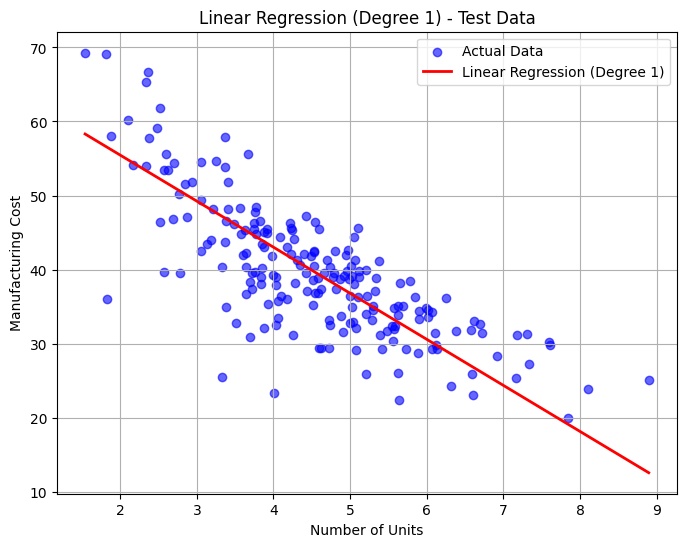

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly1 = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly1 = poly1.fit_transform(X_train)
X_test_poly1 = poly1.transform(X_test)

model_poly1 = LinearRegression()
model_poly1.fit(X_train_poly1, y_train)

y_pred_test = model_poly1.predict(X_test_poly1)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Data')

sorted_idx = np.argsort(X_test.values.ravel())
plt.plot(X_test.values.ravel()[sorted_idx], y_pred_test[sorted_idx],
         color='red', linewidth=2, label='Linear Regression (Degree 1)')

plt.xlabel("Number of Units")
plt.ylabel("Manufacturing Cost")
plt.title("Linear Regression (Degree 1) - Test Data")
plt.legend()
plt.grid(True)
plt.show()


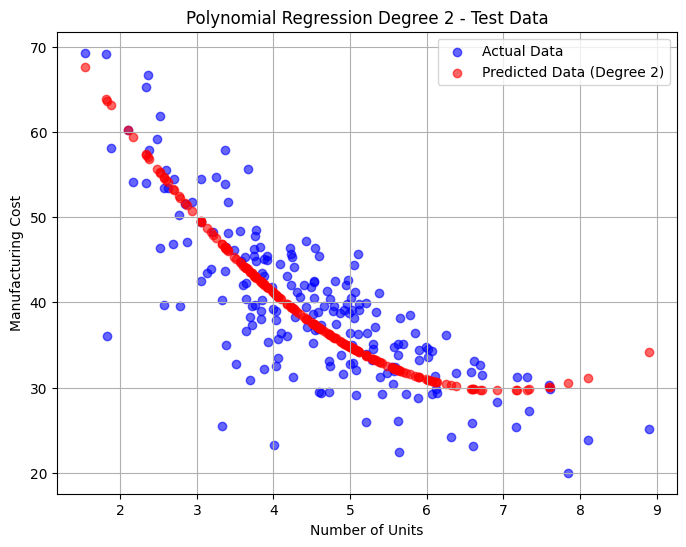

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly2, y_train)

y_pred_test = model_poly2.predict(X_test_poly2)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Data')
plt.scatter(X_test, y_pred_test, color='red', alpha=0.6, label='Predicted Data (Degree 2)')
plt.xlabel("Number of Units")
plt.ylabel("Manufacturing Cost")
plt.title("Polynomial Regression Degree 2 - Test Data")
plt.legend()
plt.grid(True)
plt.show()


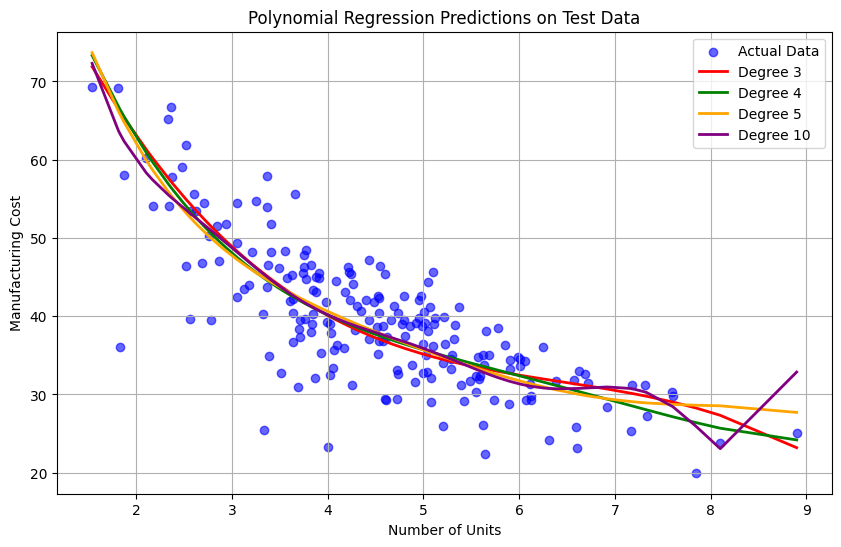

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


degrees = [ 3, 4, 5, 10]
colors = ['red', 'green', 'orange', 'purple', 'brown']

plt.figure(figsize=(10,6))

plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Data')

for i, deg in enumerate(degrees):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    sorted_idx = np.argsort(X_test.values.ravel())
    plt.plot(X_test.values.ravel()[sorted_idx], y_pred[sorted_idx],
             color=colors[i], linewidth=2, label=f'Degree {deg}')

plt.xlabel("Number of Units")
plt.ylabel("Manufacturing Cost")
plt.title("Polynomial Regression Predictions on Test Data")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:


def regression_metrics(y_true, y_pred):

    # R²
    r2 = r2_score(y_true, y_pred)
    # MAE
    mae = mean_absolute_error(y_true, y_pred)
    # MSE
    mse = mean_squared_error(y_true, y_pred)
    # RMSE
    rmse = np.sqrt(mse)
    # MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # DataFrame
    results = pd.DataFrame({
        "R2": [r2],
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "MAPE (%)": [mape]
    })

    return results


In [41]:

degrees = [1, 2, 3, 4, 5, 10]
models = {}
results = pd.DataFrame(columns=["Degree", "Dataset", "R2", "MAE", "MSE", "RMSE", "MAPE (%)"])

def regression_metrics(y_true, y_pred):

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return r2, mae, mse, rmse, mape

for deg in degrees:

    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models[deg] = model

    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)

    r2, mae, mse, rmse, mape = regression_metrics(y_train, y_pred_train)
    results = pd.concat([results, pd.DataFrame({
        "Degree": [deg],
        "Dataset": ["Train"],
        "R2": [r2],
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "MAPE (%)": [mape]
    })], ignore_index=True)

    r2, mae, mse, rmse, mape = regression_metrics(y_test, y_pred_test)
    results = pd.concat([results, pd.DataFrame({
        "Degree": [deg],
        "Dataset": ["Test"],
        "R2": [r2],
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "MAPE (%)": [mape]
    })], ignore_index=True)

results


/tmp/ipython-input-1443249749.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


,Degree,Dataset,R2,MAE,MSE,RMSE,MAPE (%)
0,1,Train,0.579692,5.053413,50.299188,7.092192,12.908076
1,1,Test,0.569590,4.513944,35.197389,5.932739,12.381988
2,2,Train,0.676169,4.615917,38.753553,6.225235,11.679365
3,2,Test,0.593690,4.372293,33.226567,5.764249,11.900041
4,3,Train,0.700578,4.541783,35.832562,5.986031,11.468244
5,3,Test,0.605170,4.282632,32.287774,5.682233,11.520753
6,4,Train,0.706101,4.502111,35.171553,5.930561,11.371191
7,4,Test,0.614049,4.245119,31.561637,5.617974,11.373248
8,5,Train,0.709458,4.458309,34.769846,5.896596,11.279722
9,5,Test,0.614760,4.269145,31.503539,5.612801,11.476244




###  R² (Coefficient of Determination)

* R² on **Train** gradually increases with degree, but not dramatically (less than 0.71 even for degree 10).
* R² on **Test** is slightly lower than Train, but the gap is small → **no strong overfitting is observed**.
* Degree 10 has the highest R² on Test (0.622), but the difference with degrees 3–5 is small.

---

### Error Metrics (MAE, RMSE)

* **MAE and RMSE on Train and Test slightly decrease** as the degree increases.
* Example:

  * Degree 1: RMSE Train = 7.09, Test = 5.93
  * Degree 10: RMSE Train = 5.84, Test = 5.56
* The reduction in errors with higher degrees is **not very significant** → increasing complexity has limited benefit.

---

### MAPE (%)

* Percentage error is around **11–12%** for all models.
* Indicates that increasing the polynomial degree **does not substantially improve relative error**.

---

### Overall Analysis

1. **Low-degree models (1–2)**:

   * Lower R² and slightly higher errors
   * Simple models with reasonably good generalization

2. **Medium-degree models (3–5)**:

   * Slightly better R² and error metrics compared to low-degree models
   * Increased complexity **does not bring major improvement**

3. **High-degree model (10)**:

   * Slightly higher R² on Train and Test
   * MAE, RMSE, and MAPE are almost similar to degree 3–5 models
   * **No severe overfitting** observed

---

### Conclusion

* **Degree 3–5 models** provide the best balance between simplicity and accuracy.
* **Higher-degree models (10)** offer minimal improvement compared to degree 3–5 → for interpretability and simplicity, medium-degree models are preferable.
* The data appears **relatively linear and low-complexity**, so very complex polynomial regression is unnecessary.




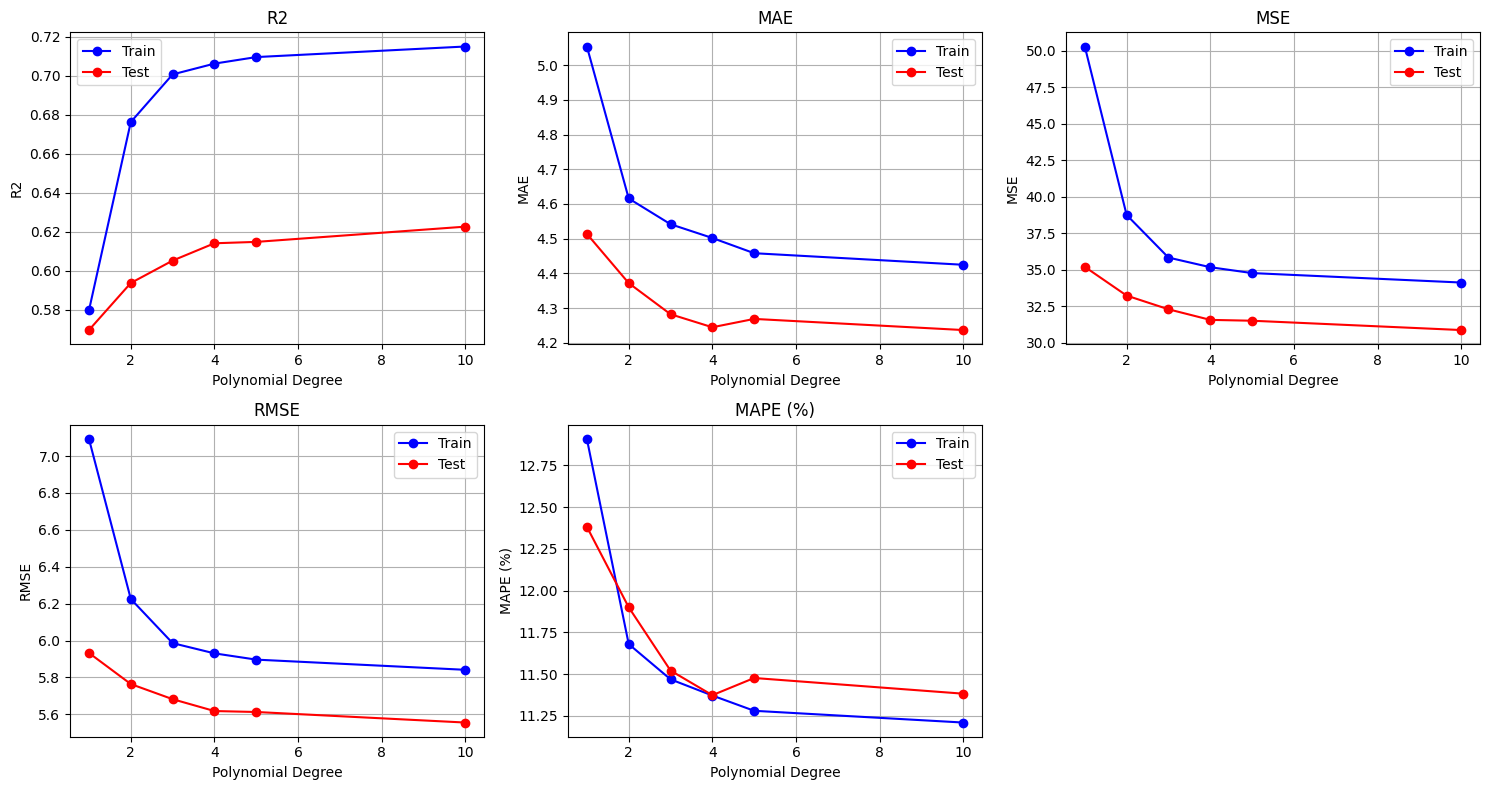

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

metrics = ["R2", "MAE", "MSE", "RMSE", "MAPE (%)"]
plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)

    plt.plot(results[results["Dataset"]=="Train"]["Degree"],
             results[results["Dataset"]=="Train"][metric],
             marker='o', label='Train', color='blue')

    plt.plot(results[results["Dataset"]=="Test"]["Degree"],
             results[results["Dataset"]=="Test"][metric],
             marker='o', label='Test', color='red')

    plt.title(metric)
    plt.xlabel("Polynomial Degree")
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()